Name: Nguyễn Lâm Vĩnh Gia - ID: 2052074

# TERM PROJECT - PROBLEM SET 2

## Exercise 1

We will import the dataset from a CSV file

In [2]:
import pandas as pd
import numpy as np

path = r"C:\Studying Documents\Artificial intelligient\Term project\LDA1.csv"
df = pd.read_csv(path, encoding="utf-8")
print(df.head())

   Feature 1  Feature 2  Intended movement
0       0.56       0.21                  0
1       0.67       0.34                  0
2       0.24       0.41                  1
3       0.52       0.92                  1
4       0.34       0.64                  1


Next, we will apply the LDA algotihtm on the dataset

[[-1.45700033  0.        ]
 [-1.58550467  0.        ]
 [ 1.57254401  1.        ]
 [ 2.06804515  1.        ]
 [ 1.96932686  1.        ]
 [-2.4914286   0.        ]
 [ 2.86207127  1.        ]
 [-1.29917036  0.        ]
 [-0.79635482  1.        ]
 [-2.00377031  0.        ]
 [ 1.63607154  1.        ]
 [-0.47482975  0.        ]]


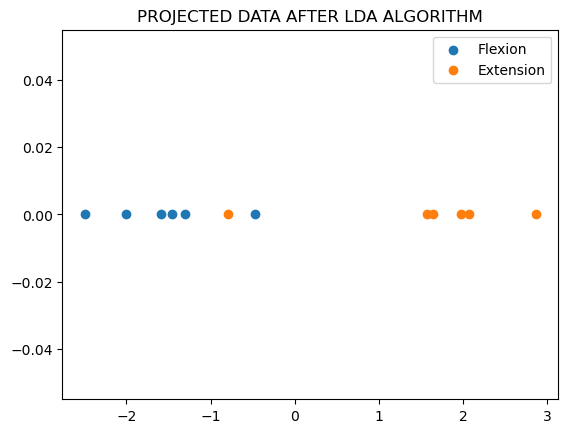

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

data = df.to_numpy()
X_train = data[:,0:2]
y_train = data[:,-1]

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_train = np.column_stack((X_train, data[:,-1]))
print(X_train)
class_1 = X_train[X_train[:,1]==0, 0]
class_2 = X_train[X_train[:,1]==1, 0]
plt.scatter(class_1, [0] * np.shape(class_1)[0], label="Flexion")
plt.scatter(class_2, [0] * np.shape(class_1)[0], label="Extension")
plt.title("PROJECTED DATA AFTER LDA ALGORITHM")
plt.legend()
plt.show()

As we can see, the projected data has significant difference between 2 classes of data. Besides, the projected data by Scikit learn is different from the projected data calculated by hand due to the Scikit learn LDA algorithm has standardized tha dataset before applying the LDA algorithm.

## Exercise 2

Import the data from a CSV file

In [4]:
path = r"C:\Studying Documents\Artificial intelligient\Term project\Bayes1.csv"
df = pd.read_csv(path, encoding="utf-8")
df['Activity'] = pd.Categorical(df['Activity']).codes
print(df.head())

   Mean  Variance  Skewness  Activity
0  0.56      0.21      0.45         2
1  0.67      0.34      0.35         1
2  0.24      0.41      0.11         3
3  0.52      0.92      0.34         0
4  0.34      0.64      0.43         1


Apply the Gaussian naive Bayesian algorithm for classification

In [5]:
data = df.to_numpy()
X_train = data[:, 0:3]
y_train = data[:,-1]
X_test = np.array([[0.43, 0.44, 0.61],[0.45, 0.32, 0.32]])

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("The result of the Gaussian naive Bayesian algorithm is: {}".format(y_pred))

The result of the Gaussian naive Bayesian algorithm is: [0. 1.]


In summary, the Scikit learn Gaussian naive Bayes predicts that the first test belongs to LMI class, while the second test belongs to the MA class, which is different with the hand calculation on the second test.

## Exercise 3

As the Trial features does not contribute any data to our classification model, we will exclude this feature from our dataset. Thus, the EMG signal dataset of MyoArm band has 2 data features, and another feature for classification of 6 different classes of gestures.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

path = r"C:\Studying Documents\Artificial intelligient\Term project\MyoArm band EMG signal.csv"
df = pd.read_csv(path, encoding="utf-8")
print(df.head())

   Mean  Kurtois  Gesture number
0     4       12               1
1     5       16               1
2     7       15               1
3     3       15               1
4    10        4               2


Data visualization

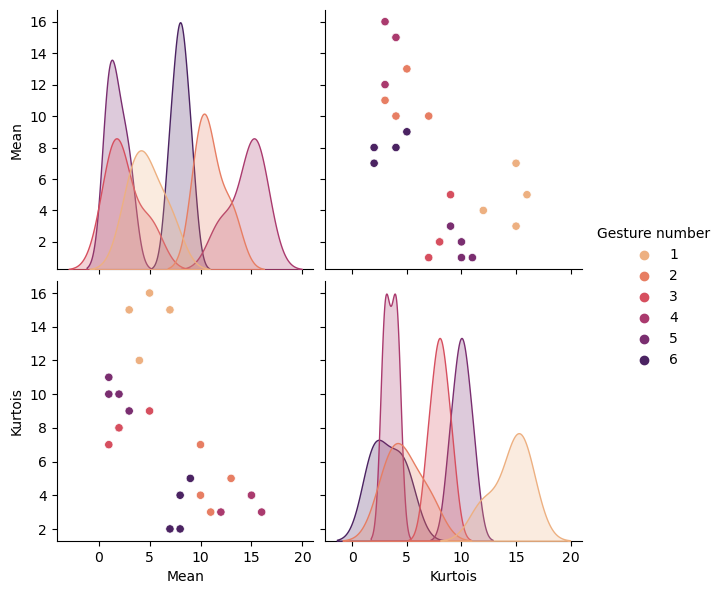

In [7]:
sns.pairplot(df, hue='Gesture number', palette='flare', height=3)

As we can see, there are huge overlapping in this dataset, which makes it to be very difficult for classifying between gesture classes.

Next, we will build the KNN model using Eucildean distance
$$ d(x^{(test)},x^{(j)}) = \sqrt{\sum_{k}(x^{(test)}_{k} - x^{(j)}_{k})^{2}} $$

In [8]:
from math import sqrt
class KNN:
    def __init__(self, k):
        self.k = k

    def euclideanDistance(self, new_data, data_point):
        dist = 0.0
        for i in range(len(data_point) - 1):
            dist += (new_data[i] - data_point[i]) ** 2
        return sqrt(dist)
    
    def getKNeighbour(self, new_data):
        distances = list()
        for data in self.train_data:
            dist = self.euclideanDistance(new_data, data)
            distances.append((dist, data[-1]))
        return sorted(distances)[:self.k]
    
    def fit(self, train_data):
        self.train_data = train_data

    def predict(self, x_test):
        k_neighbours = self.getKNeighbour(x_test)
        closest_classes = [neighbour[-1] for neighbour in k_neighbours]
        predict_class = max(set(closest_classes), key=closest_classes.count)
        return predict_class

Now we will apply the leave-one cross validation in order to determine the accuracy of our pre-designed algoithm. Suppose we choose the K number to be 7 as there are 6 different classes.

In [9]:
from sklearn.metrics import accuracy_score

df = df.to_numpy()
result = list()
my_knn = KNN(7)

for i in range(len(df)):
    X_train = df.copy()
    X_test = X_train[i]
    X_train = np.delete(X_train, i, 0)
    my_knn.fit(X_train)
    y_test = my_knn.predict(X_test)
    result.append(y_test)

print(result)
print("The accuracy of the KNN algorithm for this dataset: {}".format(accuracy_score(result, df[:,2])))

[5, 1, 1, 5, 2, 2, 2, 4, 5, 5, 3, 5, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2]
The accuracy of the KNN algorithm for this dataset: 0.25


In conclusion, the KNN algorithm performs poorly in this dataset, due to the huge overlapping as we can see in the above plots of data, as well as the large number of classes in the data and the small sample size.

## Exercise 4

### Question 1
We will import the dataset from a CSV file

In [10]:
import pandas as pd
import numpy as np

path = r"C:\Studying Documents\Artificial intelligient\Term project\LDA2.csv"
df = pd.read_csv(path, encoding="utf-8")
print(df.head())

   Age  Diastolic Blood Pressure  LDL Cholesterol  Body Mass Index  \
0   25                        80              100               23   
1   65                       100              150               28   
2   30                       110              130               30   
3   35                        70              100               22   
4   40                       100              130               27   

   Heart disease  
0              0  
1              1  
2              1  
3              0  
4              1  


Next, we will apply the LDA algotihtm on the dataset

[[ 1.87576253  0.        ]
 [-2.06555547  1.        ]
 [-2.63439065  1.        ]
 [ 2.98866035  0.        ]
 [-1.40564747  1.        ]
 [-0.11778948  0.        ]
 [-0.15750031  1.        ]
 [ 1.23190399  0.        ]
 [-1.83267262  1.        ]
 [ 1.96769735  0.        ]
 [ 2.50272184  0.        ]
 [-1.72614186  1.        ]
 [-1.0185619   1.        ]
 [ 0.221631    0.        ]
 [ 1.99809357  0.        ]
 [-0.93957802  1.        ]
 [ 1.50877476  0.        ]
 [-3.77451118  1.        ]
 [-1.05287091  1.        ]
 [ 2.42997449  0.        ]]


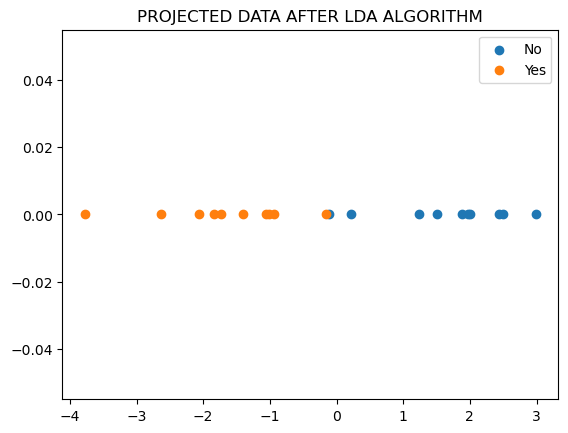

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

data = df.to_numpy()
X_train = data[:,0:4]
y_train = data[:,-1]

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_train = np.column_stack((X_train, data[:,-1]))
print(X_train)

class_1 = X_train[X_train[:,1]==0, 0]
class_2 = X_train[X_train[:,1]==1, 0]
plt.scatter(class_1, [0] * np.shape(class_1)[0], label="No")
plt.scatter(class_2, [0] * np.shape(class_1)[0], label="Yes")
plt.title("PROJECTED DATA AFTER LDA ALGORITHM")
plt.legend()
plt.show()

As we can see, the projected data has significant difference between 2 classes of data. Besides, the projected data by Scikit learn is different from the projected data calculated by hand due to the Scikit learn LDA algorithm has standardized tha dataset before applying the LDA algorithm.

### Question 2
Applying the projection matrix in the Question 1, we will project the test data on the same hyperplane for dimension reduction before applying KNN algorithm for classification of the data.

In [12]:
test_data = np.array([[40, 110, 150, 28], [25, 90, 135, 26], [65, 90, 95, 22]])
X_test = lda.transform(test_data)
print(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train[:, 0].reshape(-1, 1), y_train)
y_pred = classifier.predict(X_test)
print("The result of the test is: {}".format(y_pred))

[[-3.34127681]
 [-0.90313389]
 [ 1.85700464]]
The result of the test is: [1 1 0]


As we can see the result of the KNN classifier in Scikit learn is similar to the result calculated by hand which proves the accuracy of the computing method.

### Exercise 5

Import the data from the CSV file

In [13]:
import pandas as pd
import numpy as np

path = r"C:\Studying Documents\Artificial intelligient\Term project\LDA2.csv"
df = pd.read_csv(path, encoding="utf-8")
data = df.to_numpy()[:10, :]
print("The shape of the dataset: {}".format(data.shape))

The shape of the dataset: (10, 5)


Applying the Gaussian naive Bayes for the classification of the dataset.

In [14]:
data = df.to_numpy()
X_train = data[:, 0:4]
y_train = data[:,-1]
X_test = np.array([[25, 90, 135, 26]])

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("The result of the Gaussian naive Bayesian algorithm is: {}".format(y_pred))

The result of the Gaussian naive Bayesian algorithm is: [1]


The Bayes classifier predicts that the data belongs to a person having heart disease, which is similar to the prediction by hand calculation.

## Exercise 6

Import data from the CSV file

In [15]:
path = r"C:\Studying Documents\Artificial intelligient\Term project\Bayes2.csv"
df = pd.read_csv(path, encoding="utf-8")
print(df.head())
print(df.info())

   Diameter  Weight    Type
0       3.0     130   Apple
1       2.7     105   Apple
2       2.9     160  Orange
3       2.5     125  Orange
4       2.6     100   Apple
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Diameter  12 non-null     float64
 1   Weight    12 non-null     int64  
 2   Type      12 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 420.0+ bytes
None


Apply the Gaussian naive Bayes classification algorithm on the dataset for the prediction of the test data.

In [16]:
df['Type'] = pd.Categorical(df['Type']).codes
data = df.to_numpy()
X_train = data[:, 0:2]
y_train = data[:,-1]
X_test = np.array([[2.9, 145], [2.6, 103], [2.8, 120]])

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("The result of the Gaussian naive Bayesian algorithm is: {}".format(y_pred))

The result of the Gaussian naive Bayesian algorithm is: [0. 0. 0.]


The Bayes classifier predicts that all the 3 test data belongs to apple class.

## Exercise 7

### 1. Convolution

Apply the convolutional kernel on the original image

In [17]:
from scipy.signal import convolve2d
import numpy as np

img = np.array([[202, 225, 168, 23, 37, 33], [251, 114, 63, 66, 32, 56], [201, 40, 245, 92, 213, 216], 
                [70, 230, 132, 2, 44, 146], [8, 218, 171, 10, 193, 48], [53, 33, 30, 247, 53, 79]], dtype= np.float16)
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
new_img = convolve2d(img, kernel, mode='same')
h,w = img.shape
for i in range(h):
    for j in range(w):
        if new_img[i][j] < 0:
            new_img[i][j] = 0
        elif new_img[i][j] > 255:
            new_img[i][j] = 255
print(new_img)

[[255. 255. 255.   0.  97.  72.]
 [255.   0.   0. 120.   0.   0.]
 [255.   0. 255.   0. 255. 255.]
 [  0. 255.  12.   0.   0. 255.]
 [  0. 255. 255.   0. 255.   0.]
 [224.   0.   0. 255.   0. 255.]]


### 2. Pooling 

Apply the max and average pooling on the image has just been convoluted in the above section

In [18]:
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D

new_img = new_img.reshape(1,6,6,1)
max_model = Sequential(
    [MaxPooling2D(pool_size = 2, strides = 2)])
max_output = max_model.predict(new_img)
max_output = np.squeeze(max_output)
print(max_output)

average_model = Sequential(
    [AveragePooling2D(pool_size = 2, strides = 2)])
average_output = average_model.predict(new_img)
average_output = np.squeeze(average_output)
print(average_output)




1/1 [==============================] - 0s 219ms/step
[[255. 255.  97.]
 [255. 255. 255.]
 [255. 255. 255.]]
1/1 [==============================] - 0s 81ms/step
[[191.25  93.75  42.25]
 [127.5   66.75 191.25]
 [119.75 127.5  127.5 ]]


As we can see the calculation performed by the computer is similar to my hand computation.

## Exercise 8

Import the data from the CSV file

In [19]:
path = r"C:\Studying Documents\Artificial intelligient\Term project\DTree.csv"
df = pd.read_csv(path, encoding="utf-8")
print(df.head())
print(df.info())

   A  B  C  Y
0  0  0  1  0
1  0  1  0  0
2  1  1  0  0
3  0  0  1  1
4  1  1  1  1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       7 non-null      int64
 1   B       7 non-null      int64
 2   C       7 non-null      int64
 3   Y       7 non-null      int64
dtypes: int64(4)
memory usage: 356.0 bytes
None


Now we will train the Decision Tree model using Scikit learn library, and then apply the new test case in our model for validation.

The result of the Decision Tree algorithm is: [1 0]


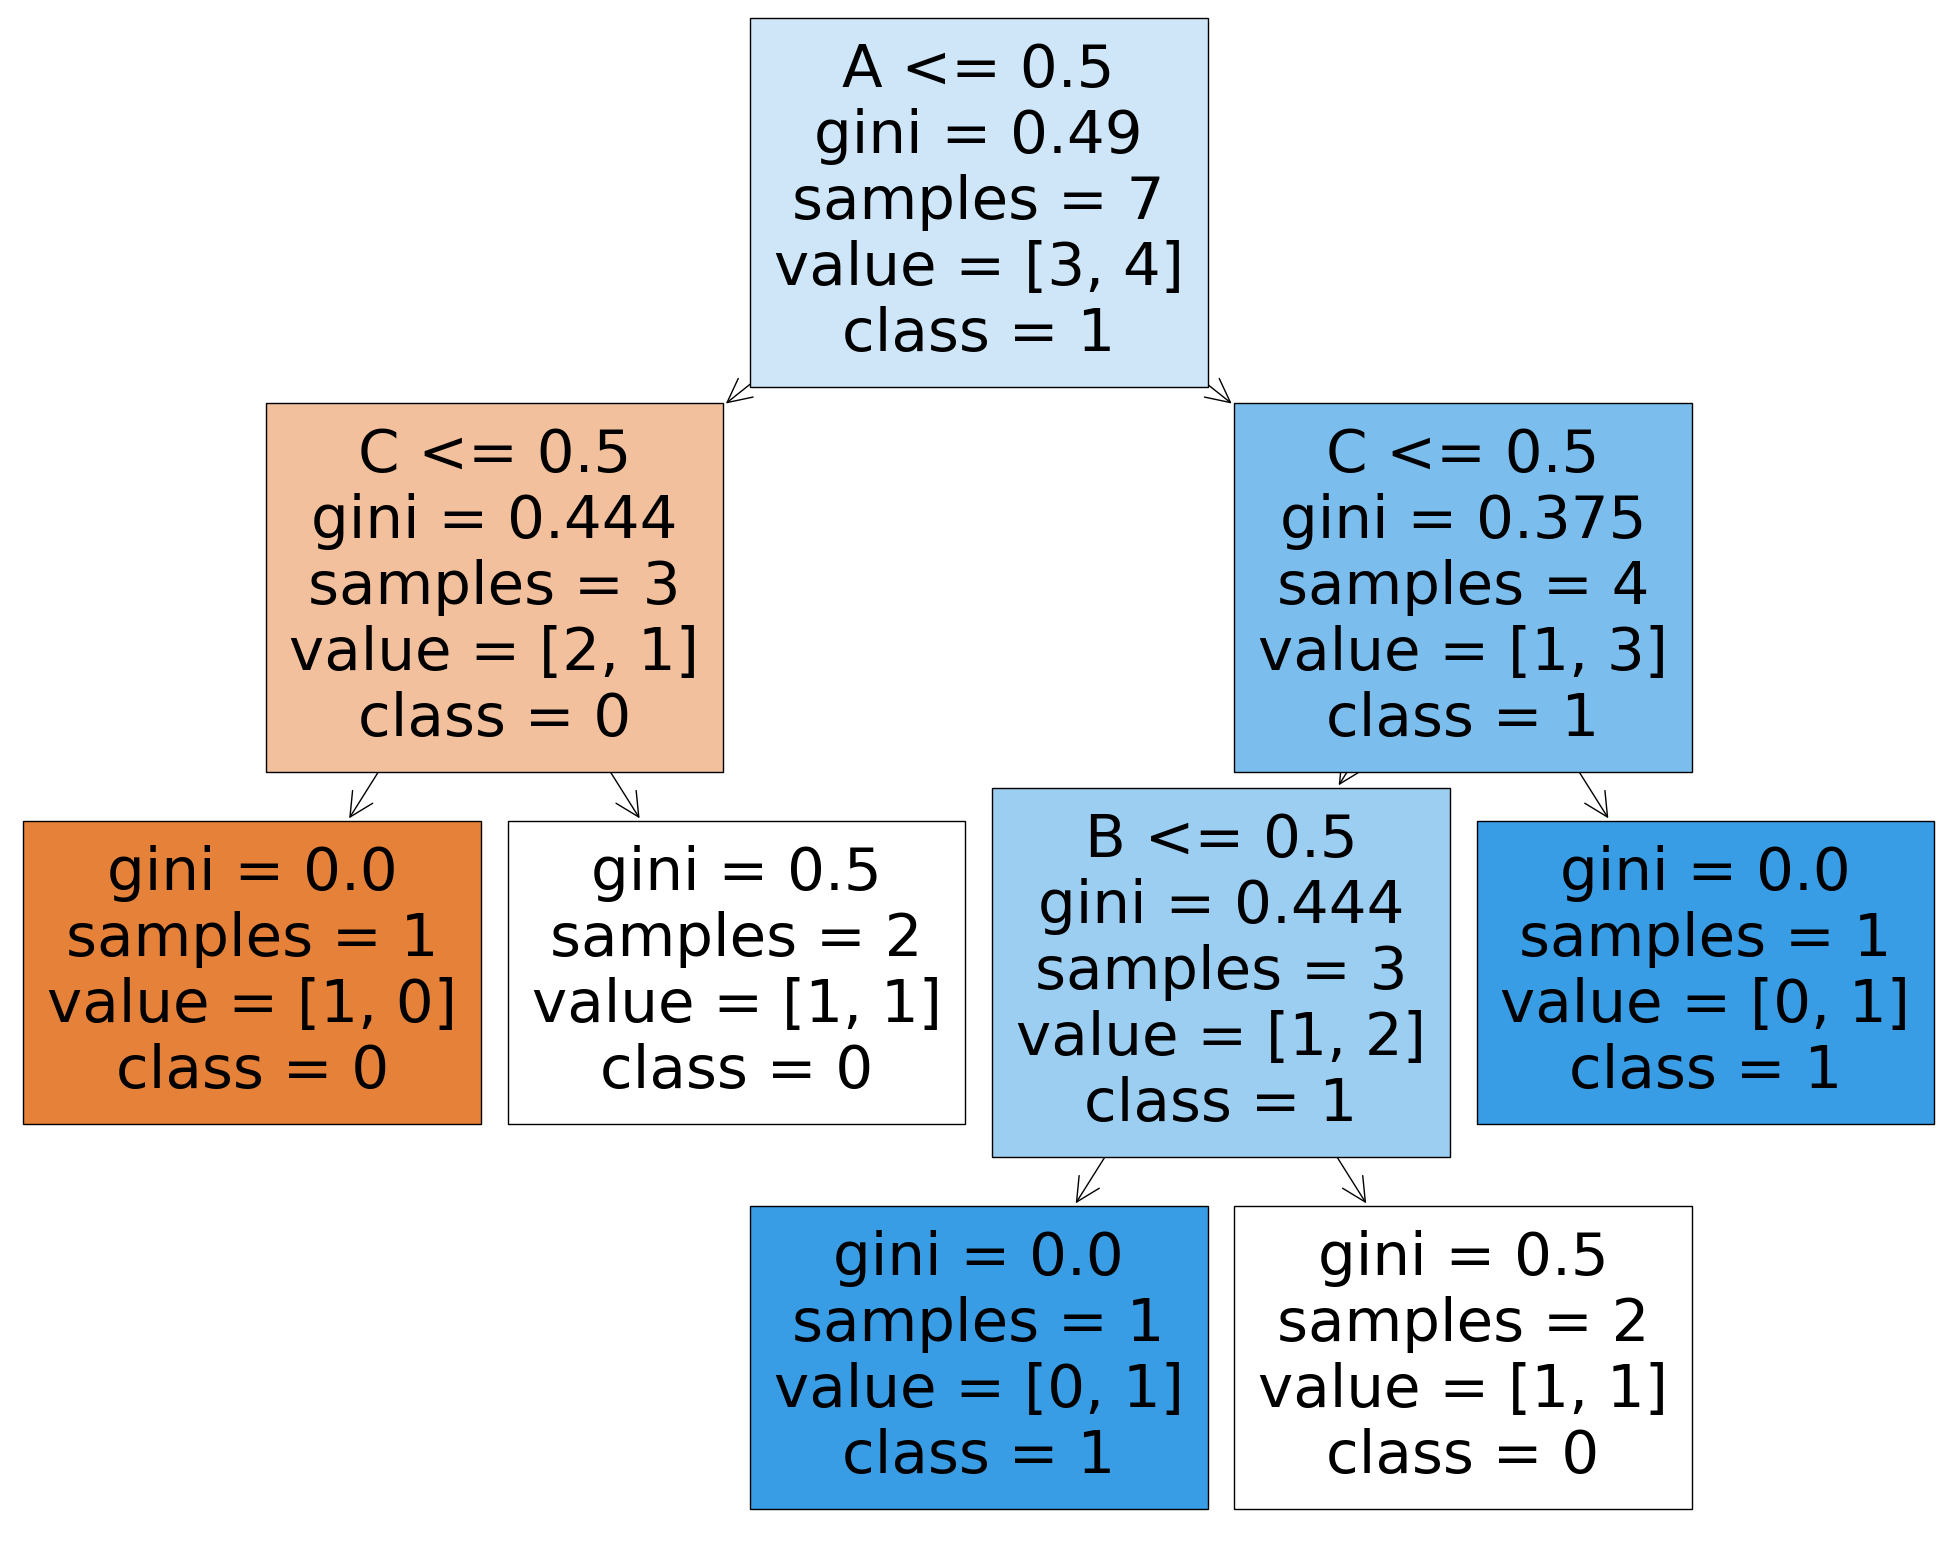

In [20]:
data = df.to_numpy()
X_train = data[:, 0:3]
y_train = data[:, -1]
X_test = np.array([[1,0,1], [0,0,0]])

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
decision_tree = DecisionTreeClassifier(min_samples_split=3, max_depth=5)
decision_tree.fit(X_train, y_train)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree, 
                   feature_names=df.columns,  
                   class_names=['0','1'],
                   filled=True)

y_pred = decision_tree.predict(X_test)
print("The result of the Decision Tree algorithm is: {}".format(y_pred))

We can see that the result of the Decision Tree algorithm is similar to our hand computaion.